# Predicting the price of a house  

•	Outcome Expected
1) Understanding the relationship between house features
   and how these variables affect the house price.
2) Predicting the price of the house using the given 
   dataset.
3) Compare the accuracy of the models.

importing libraries check the relationship between features 
also to find the visual insights.

In [1]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import warnings
warnings.filterwarnings("ignore")

Importing Data & EDA

In [2]:

data = pd.read_excel("D:/dataset/DS/DS1.xlsx")

In [3]:
data

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
data.shape

(414, 9)

In [5]:
#checking for null values
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [8]:
#checking for duplicates
data[data.duplicated()]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


In [9]:
#renaming features for convinent coding
data1=data.copy()
data1.rename(
    columns={'Transaction date':'x1','House Age':'x2','Distance from nearest Metro station (km)':'x3',
            'Number of convenience stores':'x4','latitude':'x5','longitude':'x6',
            'Number of bedrooms':'x7','House size (sqft)':'x8','House price of unit area':'y1'},inplace=True)

In [10]:
data1

,x1,x2,x3,x4,x5,x6,x7,x8,y1
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [11]:
#finding unique object in features
data1['x4'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [12]:
data1['x7'].unique()

array([1, 2, 3], dtype=int64)

In [13]:
data1['x1'].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

In [14]:
#data visualisation
plt.rcParams['figure.figsize'] = (15, 10) # plot size

In [15]:
a=['x1','x7','x4']

count     414.000000
mean     2013.148953
std         0.281995
min      2012.666667
25%      2012.916667
50%      2013.166667
75%      2013.416667
max      2013.583333
Name: x1, dtype: float64
2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: x1, dtype: int64


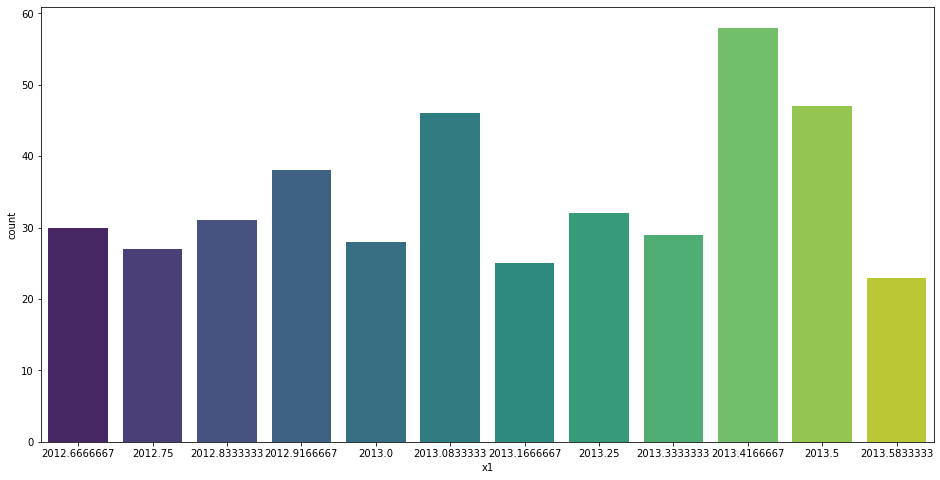

count    414.000000
mean       1.987923
std        0.818875
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: x7, dtype: float64
1    141
2    137
3    136
Name: x7, dtype: int64


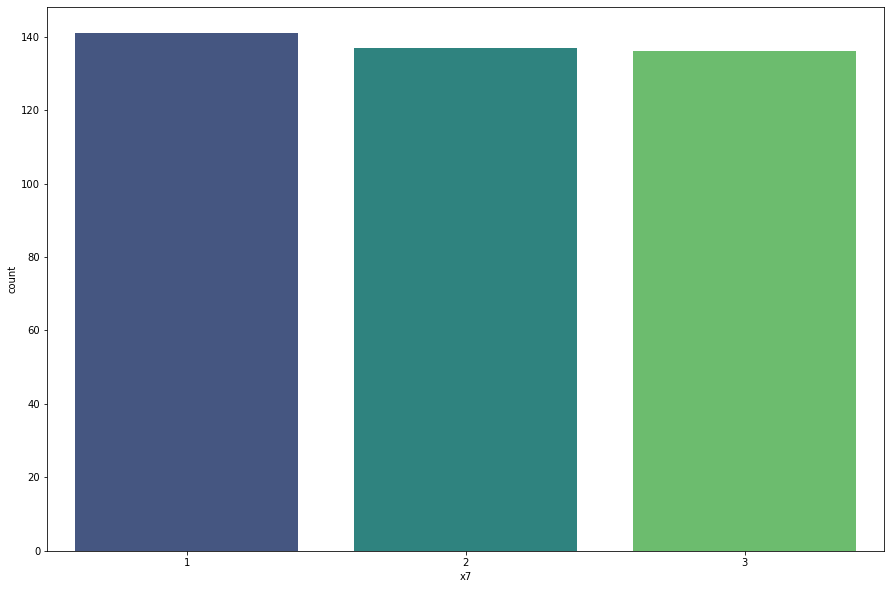

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: x4, dtype: float64
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: x4, dtype: int64


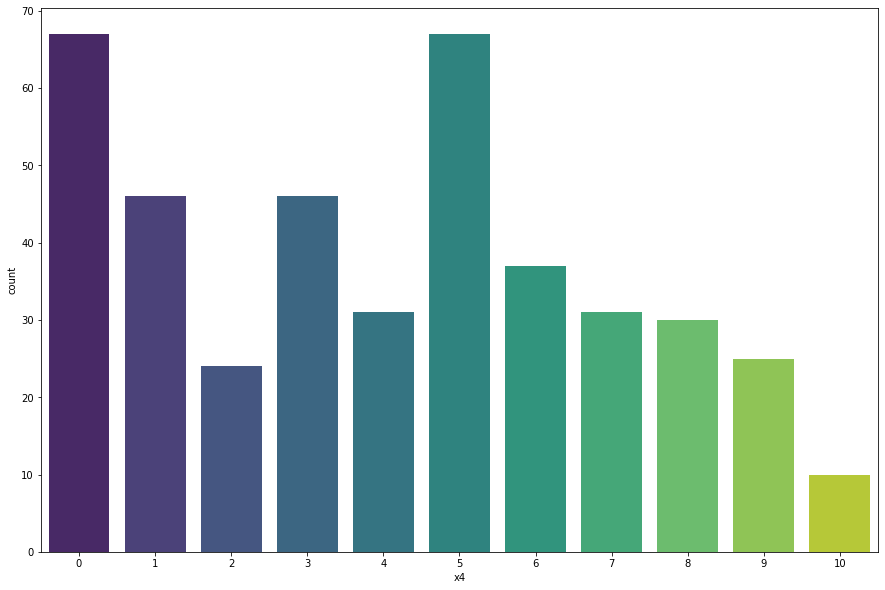

In [16]:
plt.figure(figsize=(16,8))
for i in a:
    print(data1[i].describe())
    print(data1[i].value_counts())
    sns.countplot(x=i,data=data1,palette='viridis')
    plt.show()

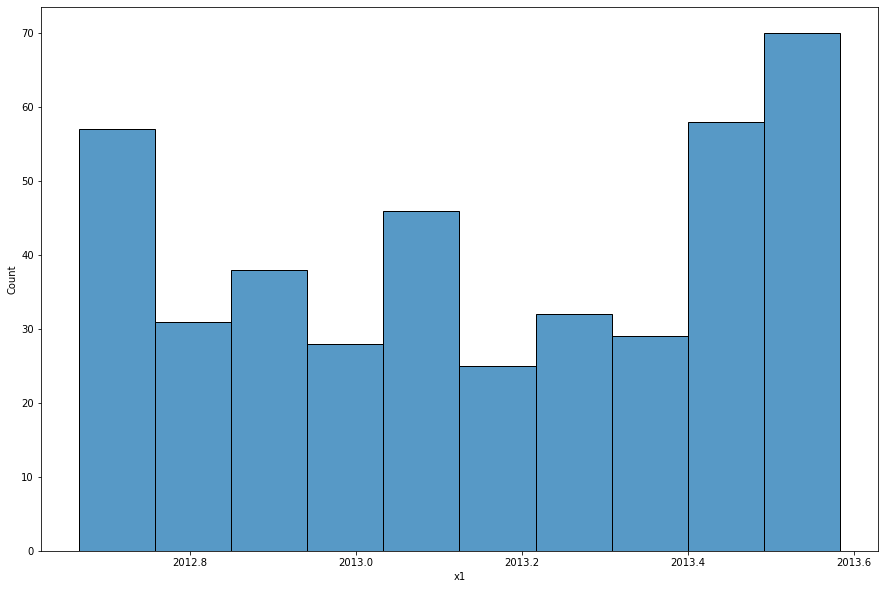

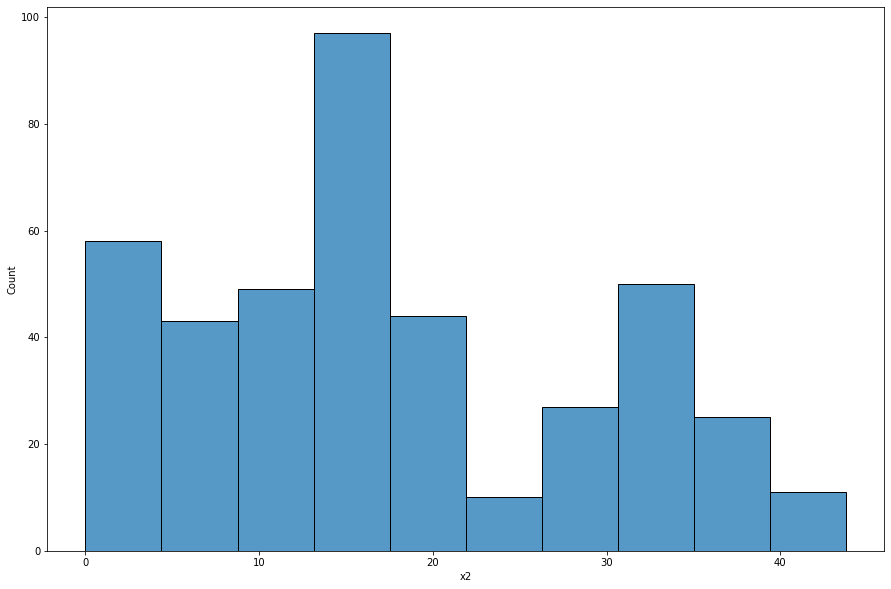

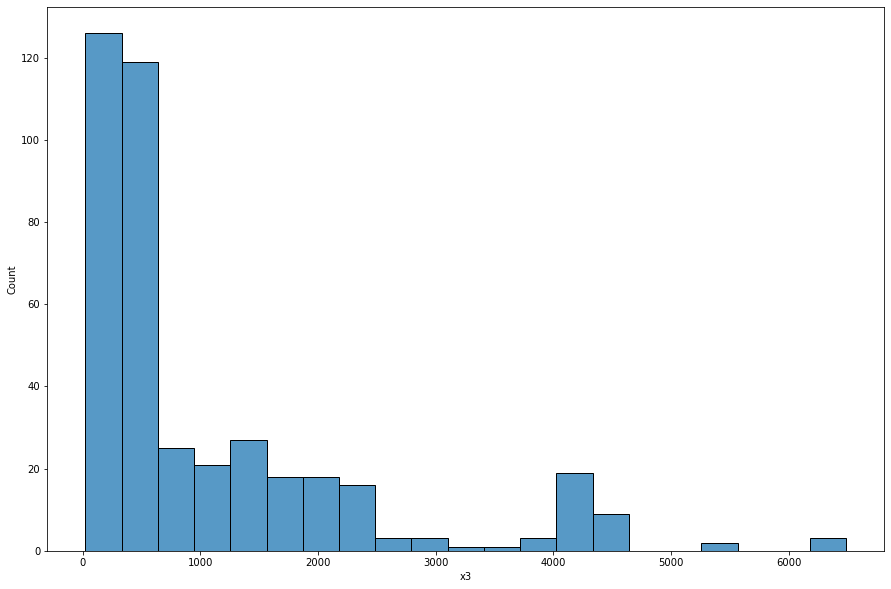

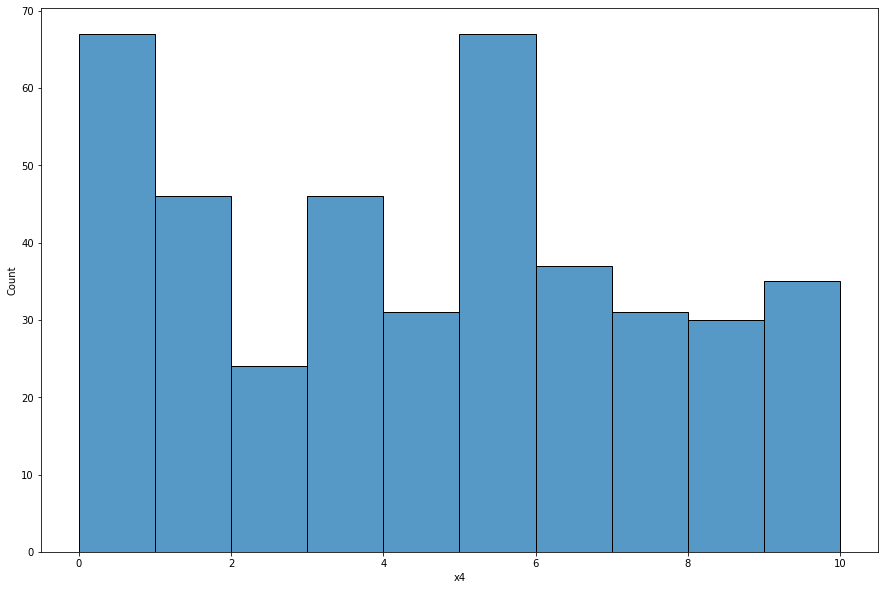

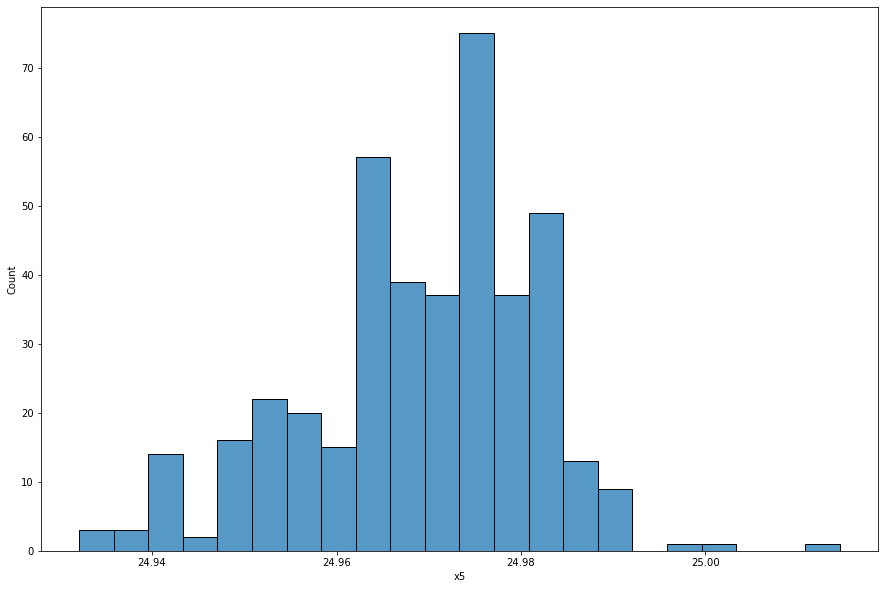

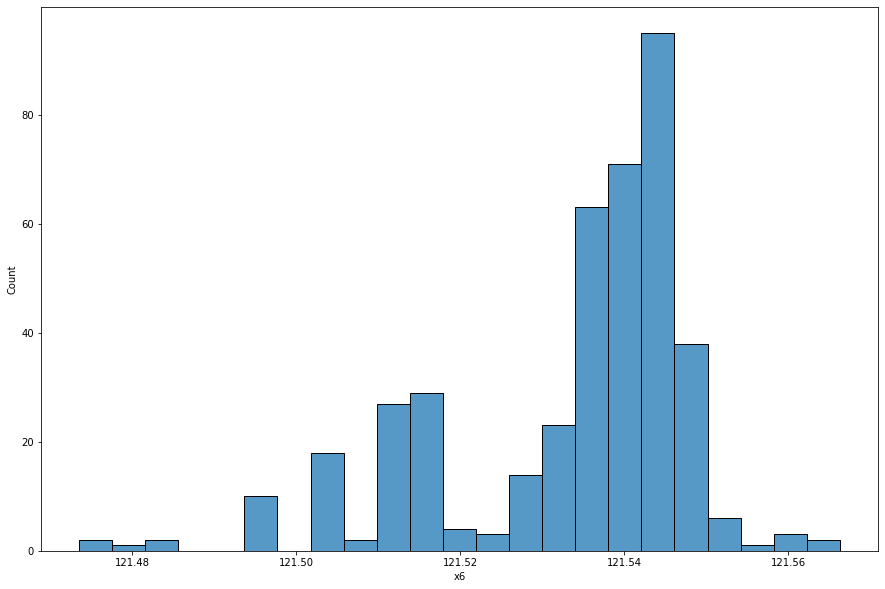

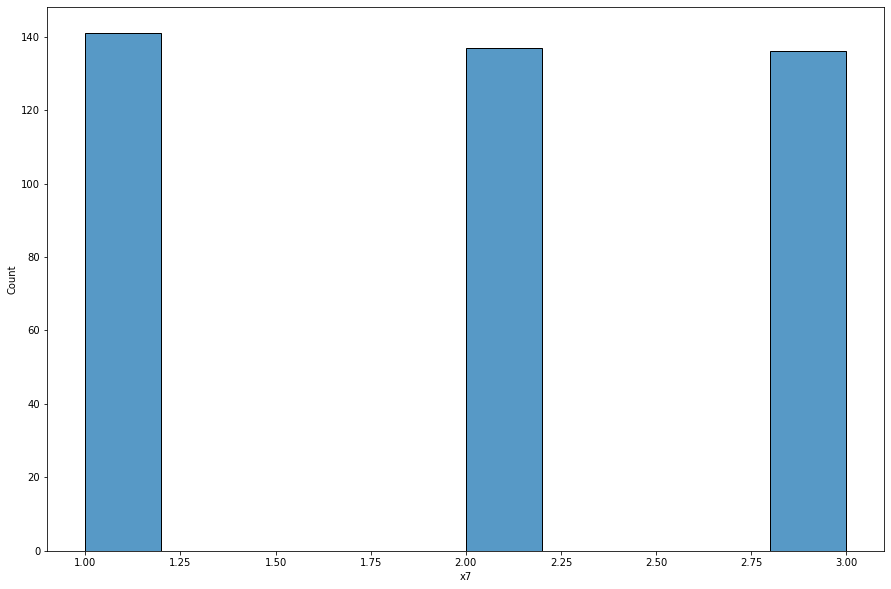

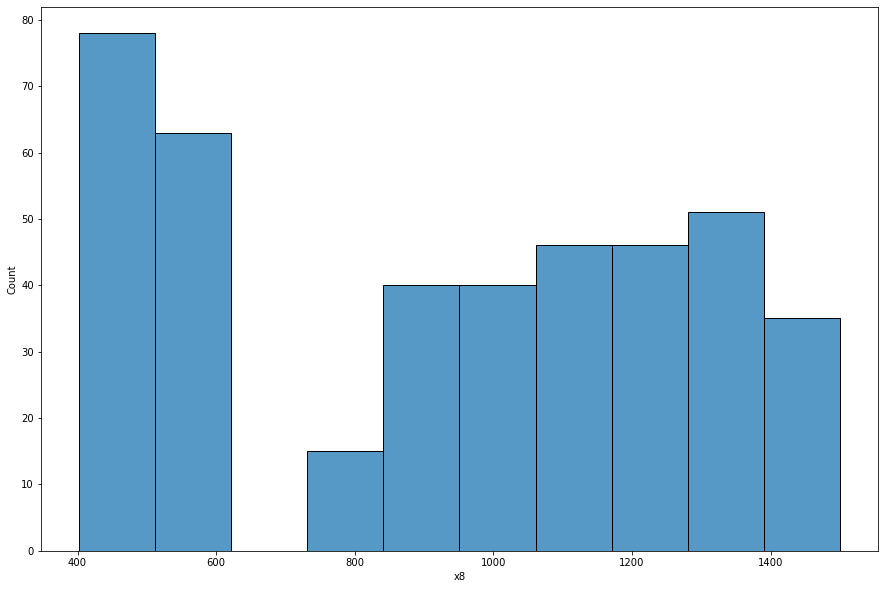

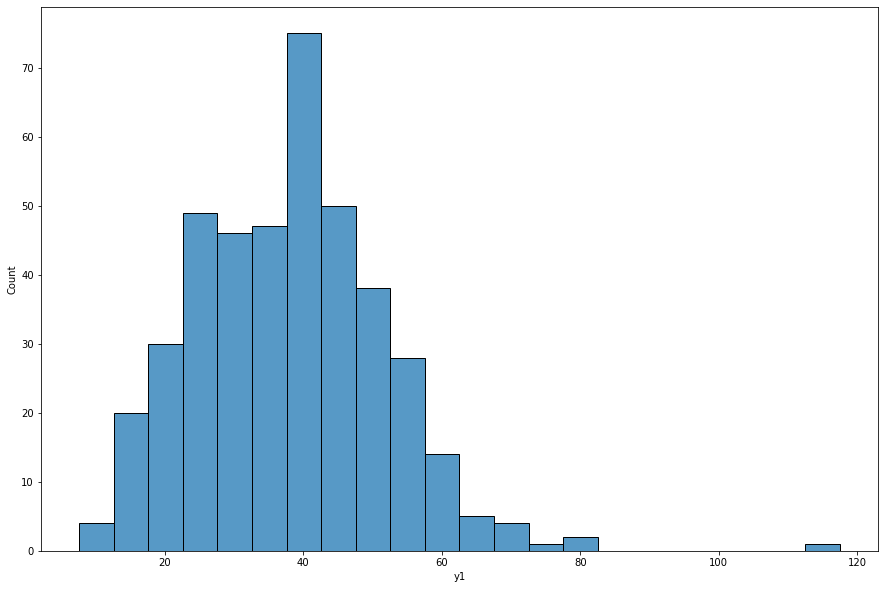

In [17]:
for i in data1:
    sns.histplot(data=data1,x=i,palette='mako')
    plt.show()

In [18]:
data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

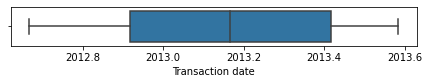

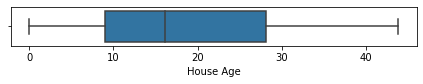

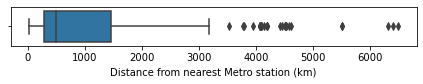

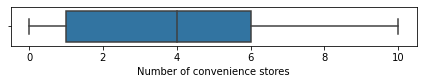

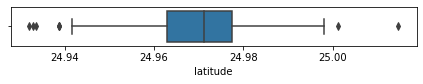

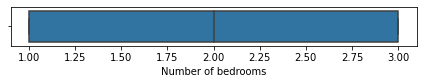

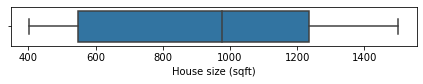

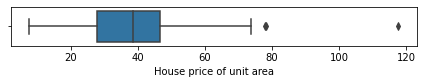

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(6,2,1)
sns.boxplot(data["Transaction date"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,2)
sns.boxplot(data["House Age"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,3)
sns.boxplot(data["Distance from nearest Metro station (km)"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,4)
sns.boxplot(data["Number of convenience stores"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,5)
sns.boxplot(data["latitude"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,6)
sns.boxplot(data["Number of bedrooms"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,7)
sns.boxplot(data["House size (sqft)"])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(6,2,8)
sns.boxplot(data["House price of unit area"])
plt.show()

In [20]:
data1.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y1
x1,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
x2,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
x3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
x4,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
x5,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
x6,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
x7,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
x8,0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
y1,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [21]:
abs(data1.corr())['y1'].sort_values(ascending=False)

y1    1.000000
x3    0.673613
x4    0.571005
x5    0.546307
x6    0.523287
x2    0.210567
x1    0.087529
x7    0.050265
x8    0.046489
Name: y1, dtype: float64

<AxesSubplot:>

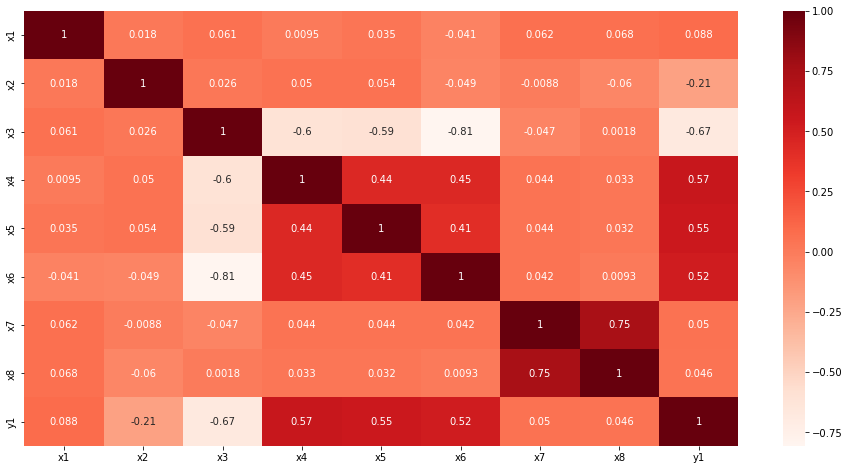

In [22]:
#heatmap to find correlation
plt.figure(figsize=(16,8))
sns.heatmap(data1.corr(),cmap='Reds',annot=True)

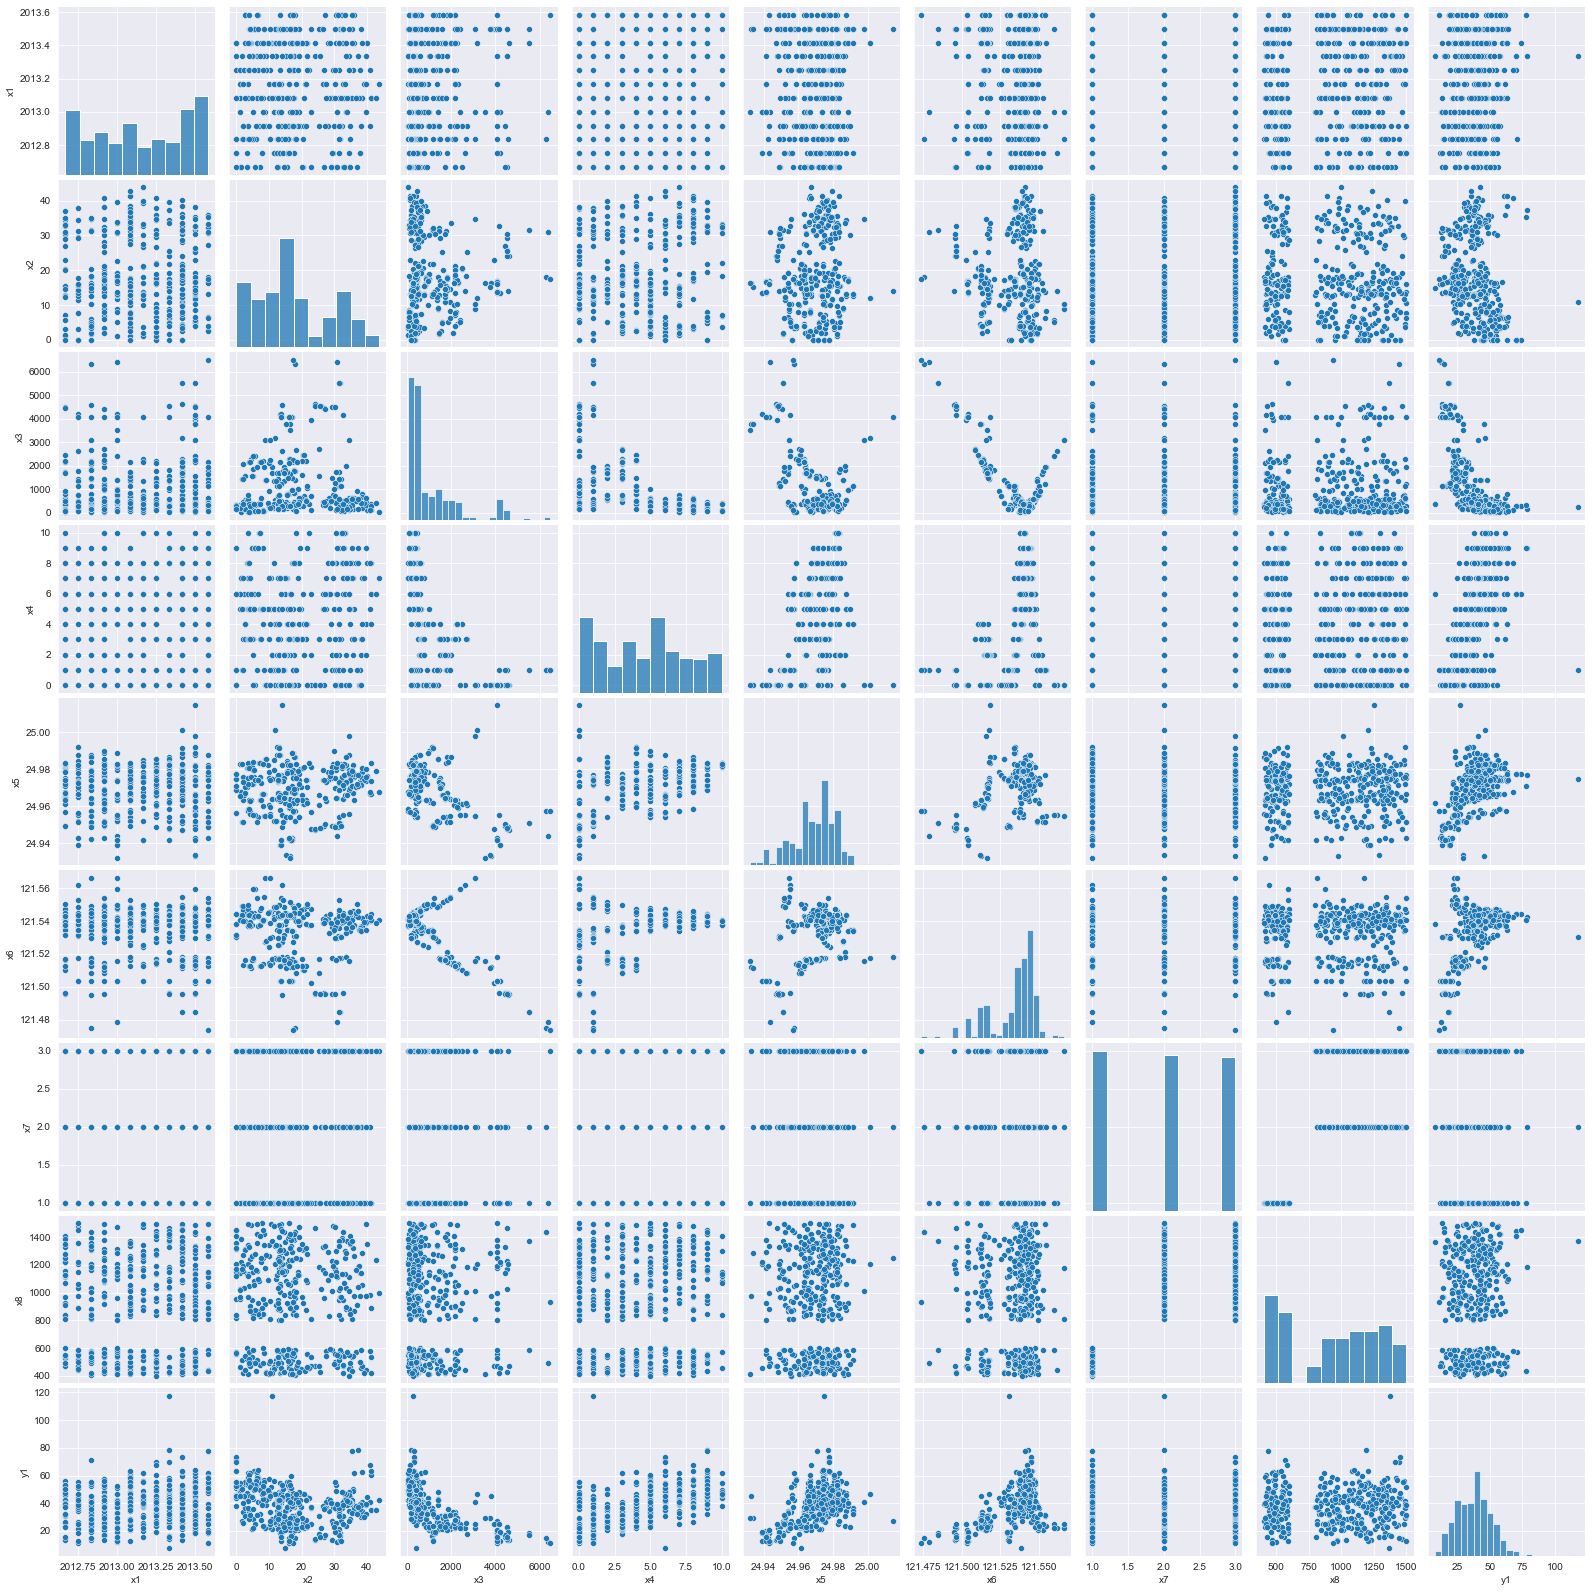

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Building Model

# Ordinary Least Squares (OLS) using statsmodels

In [24]:
import statsmodels.formula.api as smf

In [25]:
model=smf.ols("y1~x1+x2+x3+x4+x5+x6+x7+x8",data=data1).fit()

In [26]:
model

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     70.66
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           4.13e-72
Time:                        00:52:58   Log-Likelihood:                -1486.8
No. Observations:                 414   AIC:                             2992.
Df Residuals:                     405   BIC:                             3028.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.43e+04   6800.576     -2.102      0.036   -2.77e+04    -927.702
x1             5.1224      1.564      3.276      0.001       2.048       8.197
x2            -0.2681      0.039     -6.915      0.000      -0.344      -0.192
x3            -0.0045      0.001     -6.252      0.000      -0.006      -0.003
x4             1.1292      0.189      5.981      0.000       0.758       1.500
x5           224.5887     44.705      5.024      0.000     136.705     312.472
x6           -13.0067     48.704     -0.267      0.790    -108.752      82.738
x7            -0.2267      0.814     -0.279      0.781      -1.827       1.373
x8             0.0009      0.002      0.452      0.651      -0.003       0.005
==============================================================================
Omnibus:                      229.186   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3494.043
Skew:                           2.003   Prob(JB):                         0.00
Kurtosis:                      16.657   Cond. No.                     3.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model.params

Intercept   -14296.537156
x1               5.122403
x2              -0.268092
x3              -0.004511
x4               1.129208
x5             224.588668
x6             -13.006676
x7              -0.226663
x8               0.000866
dtype: float64

In [29]:
print(model.tvalues,'\n',model.pvalues)

Intercept   -2.102254
x1           3.275517
x2          -6.914584
x3          -6.251541
x4           5.981366
x5           5.023747
x6          -0.267053
x7          -0.278515
x8           0.452051
dtype: float64 
 Intercept    3.614790e-02
x1           1.145451e-03
x2           1.836072e-11
x3           1.031938e-09
x4           4.867156e-09
x5           7.615169e-07
x6           7.895642e-01
x7           7.807594e-01
x8           6.514745e-01
dtype: float64


In [30]:
print(model.rsquared,model.rsquared_adj)

0.5826048002262314 0.57435995677391


In [31]:
model.resid

0     -9.194639
1     -5.881919
2     -1.349387
3      6.510965
4     -2.868911
         ...   
409    1.384044
410   -0.139316
411   -6.072809
412    7.940910
413    9.889983
Length: 414, dtype: float64

RESIDUAL ANALYSIS

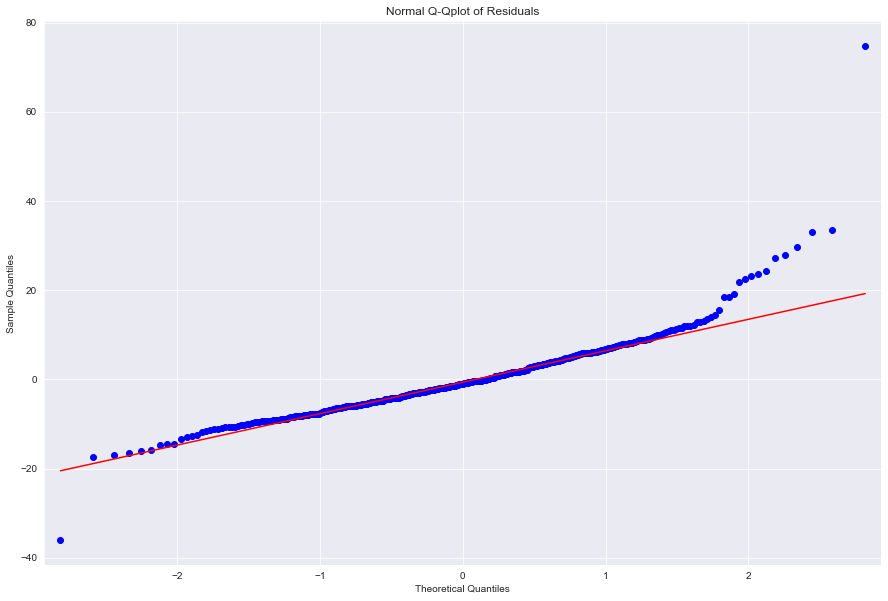

In [32]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Qplot of Residuals")
plt.show()

In [33]:
list(np.where(model.resid>40))

[array([270], dtype=int64)]

In [34]:
#MODEL DETECTION DIAGNOSTICS
#DETECTING INFLUENCOR / OUTLINERS
#COOK'S DISTANCE

In [35]:
model_influence=model.get_influence()

In [36]:
(c,_)=model_influence.cooks_distance

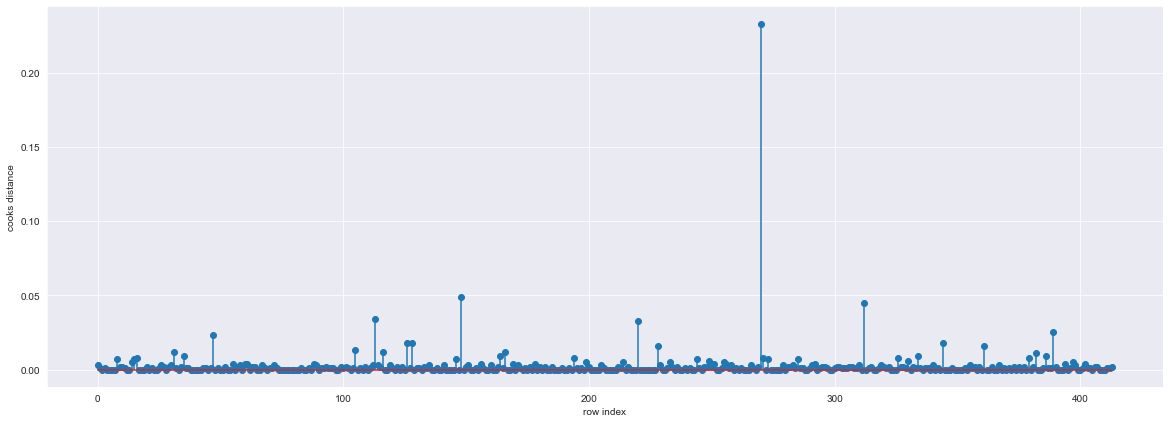

In [37]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [38]:
(np.argmax(c),np.max(c),np.min(c))

(270, 0.23284117484091083, 3.400129051273812e-09)

In [39]:
#influence plot 
from statsmodels.graphics.regressionplots import influence_plot

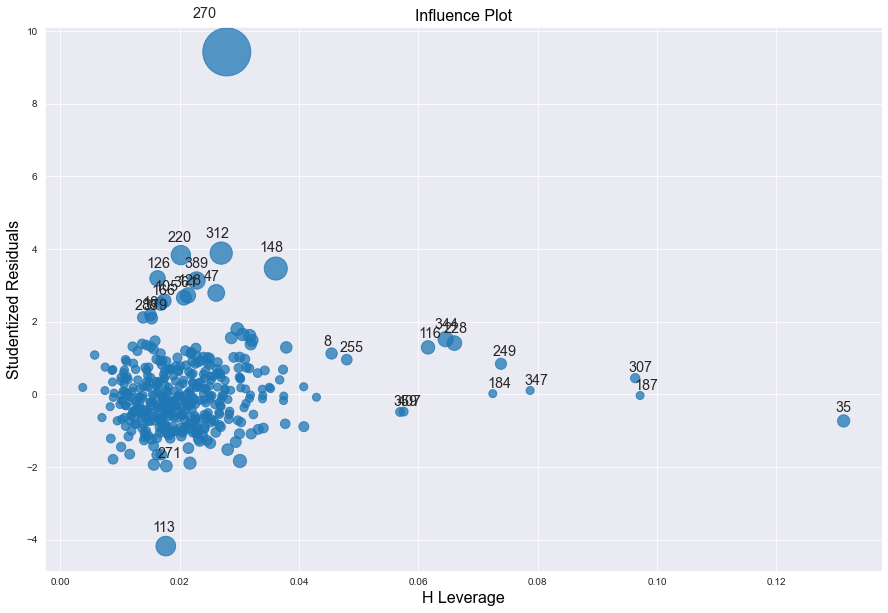

In [40]:
influence_plot(model)
plt.show()

In [41]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.07246376811594203

In [42]:
data1[data1.index.isin([270])]

,x1,x2,x3,x4,x5,x6,x7,x8,y1
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,2,1373,117.5


In [43]:
#dropping the outlier
#from the above analysis eliminating the observed readings
new_data=data1.drop(data1.index[[270]],axis=0).reset_index()
new_data

,index,x1,x2,x3,x4,x5,x6,x7,x8,y1
0,0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...,...
408,409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
409,410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
410,411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
411,412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


# CALCULATING VIF(VARIANCE INFLATION FACTOR)

In [44]:
rsq_x1=smf.ols('x1~x2+x3+x4+x5+x6+x7+x8',data=data1).fit().rsquared
vif_x1=1/(1-rsq_x1)
vif_x1

1.0192648003071574

In [45]:
rsq_x2=smf.ols('x2~x1+x3+x4+x5+x6+x7+x8',data=data1).fit().rsquared
vif_x2=1/(1-rsq_x2)
vif_x2

1.0225612054781321

In [46]:
rsq_x3=smf.ols('x3~x2+x1+x4+x5+x6+x7+x8',data=data1).fit().rsquared
vif_x3=1/(1-rsq_x3)
vif_x3

4.34771253363064

In [47]:
rsq_x4=smf.ols('x4~x2+x3+x1+x5+x6+x7+x8',data=data1).fit().rsquared
vif_x4=1/(1-rsq_x4)
vif_x4

1.620684954723498

In [48]:
rsq_x5=smf.ols('x5~x2+x3+x4+x1+x6+x7+x8',data=data1).fit().rsquared
vif_x5=1/(1-rsq_x5)
vif_x5

1.613217604034393

In [49]:
rsq_x6=smf.ols('x6~x2+x3+x4+x5+x1+x7+x8',data=data1).fit().rsquared
vif_x6=1/(1-rsq_x6)
vif_x6

2.928264518042859

In [50]:
rsq_x7=smf.ols('x7~x2+x3+x4+x5+x6+x1+x8',data=data1).fit().rsquared
vif_x7=1/(1-rsq_x7)
vif_x7

2.327636567358354

In [51]:
rsq_x8=smf.ols('x8~x2+x3+x4+x5+x6+x7+x1',data=data1).fit().rsquared
vif_x8=1/(1-rsq_x8)
vif_x8

2.339736677423496

In [52]:
vif={'variable':['x1','x2','x3','x4','x5','x6','x7','x8'],'VIF':[vif_x1,vif_x2,vif_x3,vif_x4,vif_x5,vif_x6,vif_x7,vif_x8]}
vif_frame=pd.DataFrame(vif)

In [53]:
vif_frame

,variable,VIF
0,x1,1.019265
1,x2,1.022561
2,x3,4.347713
3,x4,1.620685
4,x5,1.613218
5,x6,2.928265
6,x7,2.327637
7,x8,2.339737


In [54]:
#the vif value above 10 indicates that there is a high correlation with the other independent variables.
#the above VIF show that the independent variables are less correlated to each other.

In [55]:
final_ml=smf.ols('y1~x1+x2+x3+x4+x5+x6+x7+x8',data=new_data).fit()

In [56]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     84.87
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.11e-81
Time:                        00:52:59   Log-Likelihood:                -1442.7
No. Observations:                 413   AIC:                             2903.
Df Residuals:                     404   BIC:                             2940.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.683e+04   6170.391     -2.727      0.007    -2.9e+04   -4696.378
x1             4.6085      1.419      3.249      0.001       1.820       7.397
x2            -0.2625      0.035     -7.468      0.000      -0.332      -0.193
x3            -0.0039      0.001     -5.901      0.000      -0.005      -0.003
x4             1.2905      0.172      7.504      0.000       0.952       1.629
x5           223.7696     40.524      5.522      0.000     144.105     303.435
x6            16.4819     44.260      0.372      0.710     -70.527     103.491
x7             0.3019      0.740      0.408      0.683      -1.153       1.756
x8            -0.0008      0.002     -0.438      0.662      -0.004       0.003
==============================================================================
Omnibus:                       64.250   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.130
Skew:                           0.765   Prob(JB):                     2.29e-36
Kurtosis:                       5.683   Cond. No.                     3.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
final_ml.rsquared,final_ml.aic

(0.6269480324175076, 2903.3804333555336)

In [58]:
x=new_data.drop('y1',axis=1)
y=new_data['y1']


In [59]:
#Standardization of dataset
from sklearn.preprocessing import StandardScaler  

In [60]:
st_x= StandardScaler()  
x= st_x.fit_transform(x)


In [61]:
x

array([[-1.72508883, -0.82256873,  1.25320184, ...,  0.44778163,
        -1.20640384, -1.02060476],
       [-1.71672867, -0.82256873,  0.15549671, ...,  0.40021384,
         0.01478436,  0.88904414],
       [-1.7083685 ,  1.54276389, -0.38896504, ...,  0.68692383,
         1.23597256,  0.37214669],
       ...,
       [ 1.7109393 ,  0.36009758,  0.09402522, ...,  0.42302031,
        -1.20640384, -1.22736373],
       [ 1.71929947, -0.52690224, -0.84561037, ...,  0.47580102,
        -1.20640384, -0.9574284 ],
       [ 1.72765963,  1.2470974 , -0.98611663, ...,  0.63414313,
         0.01478436,  0.47839783]])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=0)

In [64]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(330, 9)
(83, 9)
(330,)
(83,)


In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model1=LinearRegression(fit_intercept=True)

In [67]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [68]:
model1.intercept_,model1.coef_

(38.01636823789517,
 array([-0.5851061 ,  1.63512332, -2.84430449, -5.02659534,  3.68880966,
         2.74051789,  0.10199321,  0.05017378, -0.3081686 ]))

In [69]:
ypred_linear=model1.predict(xtest)
ypred_linear

array([48.11261864, 13.35308301, 36.54948213, 13.23832637, 34.8825131 ,
       27.02265613, 41.59186213, 34.49857139, 50.15855082, 32.06351096,
       39.3500532 , 40.99861638, 47.59350277, 40.07601298, 45.87349882,
       38.67736062, 36.01277195, 39.44146375, 41.31617079, 43.12667195,
       49.23699046, 32.05963373, 30.22410646, 45.80109765, 46.47109835,
       43.40546852, 47.43623023, 31.60769181, 47.05910271, 21.60185221,
       44.06677571, 36.40069848, 41.7698851 , 39.06538327, 33.32448139,
       41.53100613, 47.64762829, 39.67586166, 53.39779057, 40.82474137,
       52.06455499, 33.57394237, 40.28327747, 49.63283524, 15.15536718,
       43.68161017, 42.74763336, 11.76585598, 35.02006347, 48.42576894,
       53.05025515, 39.6862491 , 48.75015784, 24.89527785, 30.47021708,
       37.02269541, 45.72437292, 40.8617014 , 34.48508641, 30.89692754,
       44.9988083 , 44.77386925, 38.90772505, 47.66894018, 36.80661789,
       30.62462597, 10.66028855, 36.06305181, 46.24777478, 41.56

In [70]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score as evs # evaluation metric

In [71]:
print(mean_absolute_error(ytest,ypred_linear))
print(mean_absolute_percentage_error(ytest,ypred_linear))
print(r2_score(ytest,ypred_linear))
print(evs(ytest,ypred_linear))

5.390549270818969
0.16346625608264967
0.7110228378040231
0.7197795822188423


In [72]:
print('Train Score: ', model1.score(xtrain, ytrain))  
print('Test Score: ', model1.score(xtest, ytest))  

Train Score:  0.6084330655310721
Test Score:  0.7110228378040231


The above score tells that our model is 60.84% accurate with the training dataset and 71.10% accurate with the test dataset

# Ridge Regression

In [73]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [74]:
# define model
model_2 = Ridge(alpha=0.0)
# define model evaluation method
cv1 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_2, x, y, scoring='neg_mean_absolute_error', cv=cv1, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 6.081 (0.842)


In [75]:
#  plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import  Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error



In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

In [77]:
# initialize
ridge_reg = Ridge(alpha=0,fit_intercept=True)
ridge_pred=ridge_reg.fit(xtrain, ytrain)
ridge_train_pred = ridge_reg.predict(xtrain)
ridge_y=ridge_pred.predict(xtest)  


  

In [78]:
# R-squared of test set

print(r2_score(ytest,ridge_y))

# R-squared of test set

print(evs(ytest,ridge_y) )




0.48029520762382627
0.5010114272306803


# Support vector Regression model

In [79]:
from sklearn.svm import SVR

regressor=SVR(kernel='linear',degree=1,C=1.0,epsilon=0.1,)

In [80]:
#SPLIT INTO TRAIN AND TEST SET

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [81]:
#FIT THE MODEL DO THE PREDICTION

regressor.fit(xtrain,ytrain)

pred_SVR=regressor.predict(xtest)

In [82]:
#CHECK THE ACCURACY

print(regressor.score(xtest,ytest))

from sklearn.metrics import r2_score

print(r2_score(ytest,pred_SVR))
print(evs(ytest,pred_SVR))

0.7484782685068435
0.7484782685068435
0.75127915048199


# Lasso Regrerssion

In [83]:
#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( x, y, 
                                      test_size=0.2, random_state=0)

In [84]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

lasso = Lasso(alpha = 0.01)
lasso.fit(xtrain, ytrain)
lasso_yhat = lasso.predict(xtest)

In [85]:
lasso=r2_score(ytest,lasso_yhat)
lasso1=evs(ytest,lasso_yhat)

# Conclusion

The ‘explained_variance_score’ metric score should not below 0.60 or 60%.
The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).

In [86]:
pip install --upgrade termcolor

In [87]:
# 1. Explained Variance Score
from termcolor import colored as cl # text customization
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of linear model is {}'.format(evs(ytest, ypred_linear)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(ytest, ridge_y)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(ytest, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of SVR model is {}'.format(evs(ytest, pred_SVR)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of linear model is 0.7197795822188423
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is -0.37737440741280515
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.7197710398362616
-------------------------------------------------------------------------------
Explained Variance Score of SVR model is -0.5614856114873099
-------------------------------------------------------------------------------


In [88]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of linear Regression model is {}'.format(r2_score(ytest, ypred_linear)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2_score(ytest, ridge_y)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2_score(ytest, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of SVR model is {}'.format(r2_score(ytest, pred_SVR)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of linear Regression model is 0.7110228378040231
-------------------------------------------------------------------------------
R-Squared of Ridge model is -0.40503535949297387
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.7109659943314423
-------------------------------------------------------------------------------
R-Squared of SVR model is -0.5812372719711485
-------------------------------------------------------------------------------


When analyzing the report, it is noted that the R-squared of the Multilinear regression model is seemed to be the highest which means, 
it takes the place of being the most suitable model for our dataset (on the basis of R-squared).
It is followed by the lasso regression model